Importing Libraries

In [19]:
import pandas as pd
from bayesian_opt import preprocessor, preprocessor_any_func
from data_generation import dec_exp_fn

Example usage of preprocessing.

In [2]:
params = [(1,3,4,5),(1,2,4,5),(2,5,67,7)]
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
params[1]

(1, 2, 4, 5)

In [20]:
raw_df = pd.read_excel('internship_simplified.xlsx',sheet_name='Sheet1')
settings_df = pd.read_excel('internship_simplified.xlsx',sheet_name='Sheet2')


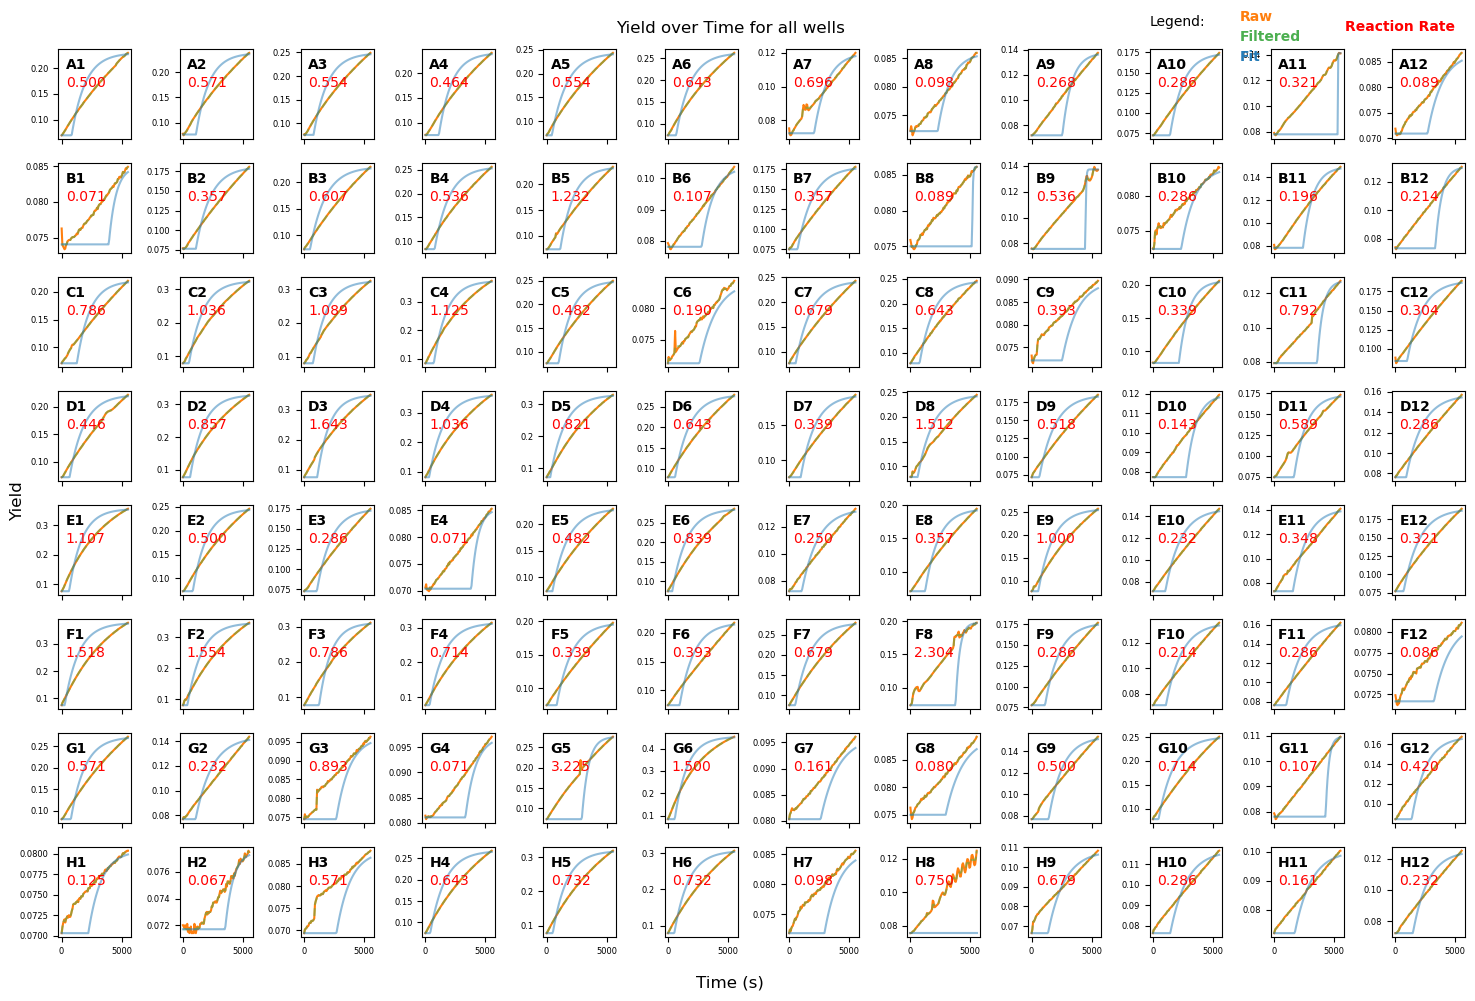

,pH,c1,c2,dec_exp_a,dec_exp_b,dec_exp_c,dec_exp_d,norm_yield_grad,max_yield
0,6.398,0.820,1.512,0.2296,0.000878,427.0,0.06960,0.500000,0.2296
1,6.096,0.051,1.180,0.2376,0.000920,667.0,0.07730,0.571429,0.2376
2,5.836,0.412,1.234,0.2492,0.000856,367.0,0.07545,0.553571,0.2492
3,6.104,0.388,1.250,0.2413,0.000933,727.0,0.07480,0.464286,0.2413
4,6.024,0.282,0.108,0.2434,0.000793,7.0,0.07090,0.553571,0.2434
...,...,...,...,...,...,...,...,...,...
91,5.728,0.820,1.746,0.1249,-0.000000,5527.0,0.07570,0.750000,0.1249
92,5.450,0.399,1.752,0.1083,0.000729,67.0,0.06640,0.678571,0.1083
93,5.216,0.816,0.338,0.1167,0.000736,7.0,0.07640,0.285714,0.1167
94,5.392,0.343,0.960,0.1004,0.000733,7.0,0.07180,0.160714,0.1004


In [22]:
df = preprocessor(settings_df, raw_df, ['G6','G9'], plot=True)
df

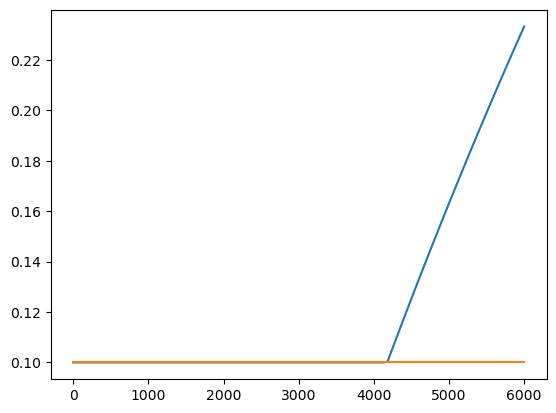

In [18]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt

# Define the model function
def dec_exp_fn(t, a, b, c, d):
    f = a * (1 - np.exp(-b * t + b * c))
    f[f < d] = d
    return f

# Nonlinear least squares fitting function
def nonlinear_least_squares_dec_exp(t_vals, y_vals, c, d):
    t_vals = np.asarray(t_vals).reshape(-1)
    y_vals = np.asarray(y_vals).reshape(-1)

    # Define the function to fit: we know c and d, so only a and b are fit
    def model(t, a, b):
        return dec_exp_fn(t, a, b, c, d)

    # Provide initial guesses for a and b
    # For example, let's assume a is around the maximum value of y_vals and b is very small
    a_initial = np.max(y_vals)
    b_initial = 0.0001  # A small value for b, which is the default assumption

    # Use curve_fit to fit a and b
    popt, _ = curve_fit(model, t_vals, y_vals, p0=[a_initial, b_initial], bounds=(0, [1, np.inf]))

    # Extract fitted parameters a and b
    a_fit, b_fit = popt

    # Calculate the fitted values and r-squared score
    y_pred = dec_exp_fn(t_vals, a_fit, b_fit, c, d)
    score = r2_score(y_vals, y_pred)

    # Return the fitted parameters and the score
    return (a_fit, b_fit, c, d), score

# Example usage
t_vals = np.linspace(0, 6000, 100)  # Example time values
y_vals = dec_exp_fn(t_vals, 0.9, 0.0001, 3000, 0.1)  # Example data with known parameters (a=0.8, b=0.0001, c=3000, d=0.1)

c = 3000  # Known c
d = 0.1   # Known d

# Call the fitting function
params, score = nonlinear_least_squares_dec_exp(t_vals, y_vals, c, d)

y_pred = dec_exp_fn(t_vals, *params)

plt.plot(t_vals, y_vals)
plt.plot(t_vals, y_pred)

Plotting is optional. It works for different well amounts. The output df is ready for bayesian optimization. Excluding the last column.